In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_full.json"

def load_data(data_path):
    """Loads training dataset from json file
    
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    
    """
    
    with open(data_path, "r") as fp:
        data = json.load(fp)
        
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets(test_size, validation_size):
    
    # load data
    X, y = load_data(DATA_PATH)
    
    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
    
    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = validation_size)
    
    # 3d array -> (130, 13, 1)
    X_train = X_train[..., np.newaxis] # 4d array -> (num_samples, 130, 13, 1)
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    y_train = y_train[..., np.newaxis]
    y_validation = y_validation[..., np.newaxis]
    y_test = y_test[..., np.newaxis]
    
    return (X_train, X_validation, X_test, y_train, y_validation, y_test)

def build_model(input_shape):
    
    # create model
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation = 'relu', input_shape = input_shape))
    model.add(keras.layers.MaxPool2D((3, 3), strides = (2, 2), padding = 'same'))
    model.add(keras.layers.BatchNormalization())
    
    # flatten the output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation = 'relu'))
    model.add(keras.layers.Dropout(0.3))
    
    # output layer
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    
    return model
    
    
def plot_history(history):
    
    fig, axs = plt.subplots(2)
    
    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label = "train accuracy")
    axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy eval")
    
    # create accuracy subplot
    axs[1].plot(history.history["loss"], label = "train error")
    axs[1].plot(history.history["val_loss"], label = "test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Error eval")
    
    plt.show()
    
def predict(model, X, y):
    
    X = X[np.newaxis, ...]
    
    # prediction = [ [0.1, 0.2, ...]]
    prediction = model.predict(X) # X -> (1, 130, 13, 1)
    
    # extract index with max value
    predicted_index = np.argmax(prediction, axis = 1) #[4]
    print("Expected index: {}, Predicted index: {}".format(y,  predicted_index))

2024-11-12 15:48:10.518732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 15:48:10.525415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 15:48:10.526006: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 15:48:10.527153: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Epoch 1/100


2024-11-12 15:48:10.529631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 15:48:10.530228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 15:48:10.530722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 15:48:11.254280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-12 15:48:11.254769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not op

188/188 [==============================] - 7s 11ms/step - loss: 2.3423 - accuracy: 0.2375 - val_loss: 1.8854 - val_accuracy: 0.3391
Epoch 2/100
188/188 [==============================] - 1s 6ms/step - loss: 1.8437 - accuracy: 0.3650 - val_loss: 1.5658 - val_accuracy: 0.4406
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 1.6282 - accuracy: 0.4233 - val_loss: 1.4457 - val_accuracy: 0.4860
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 1.4935 - accuracy: 0.4662 - val_loss: 1.3655 - val_accuracy: 0.5120
Epoch 5/100
188/188 [==============================] - 1s 6ms/step - loss: 1.3998 - accuracy: 0.5036 - val_loss: 1.2979 - val_accuracy: 0.5374
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 1.3383 - accuracy: 0.5176 - val_loss: 1.2391 - val_accuracy: 0.5474
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 1.2714 - accuracy: 0.5428 - val_loss: 1.1960 - val_accuracy: 0.5734
Epoch 8/10

188/188 [==============================] - 1s 6ms/step - loss: 0.4315 - accuracy: 0.8553 - val_loss: 0.7757 - val_accuracy: 0.7490
Epoch 59/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4358 - accuracy: 0.8509 - val_loss: 0.7735 - val_accuracy: 0.7483
Epoch 60/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4079 - accuracy: 0.8628 - val_loss: 0.8158 - val_accuracy: 0.7457
Epoch 61/100
188/188 [==============================] - 1s 5ms/step - loss: 0.4176 - accuracy: 0.8558 - val_loss: 0.7837 - val_accuracy: 0.7530
Epoch 62/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4118 - accuracy: 0.8575 - val_loss: 0.7718 - val_accuracy: 0.7510
Epoch 63/100
188/188 [==============================] - 1s 6ms/step - loss: 0.4010 - accuracy: 0.8636 - val_loss: 0.7729 - val_accuracy: 0.7437
Epoch 64/100
188/188 [==============================] - 1s 6ms/step - loss: 0.3988 - accuracy: 0.8628 - val_loss: 0.8099 - val_accuracy: 0.7443
Epoch

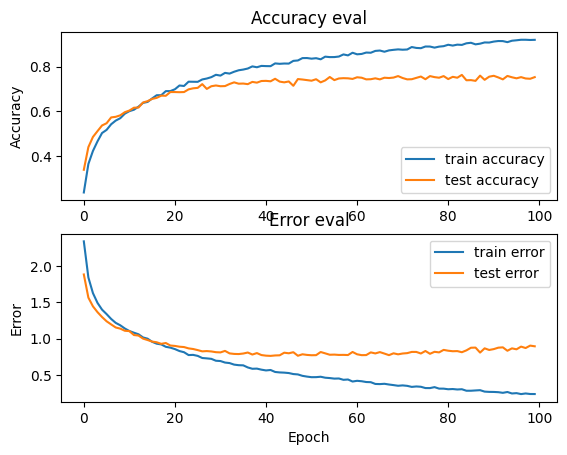

In [2]:
if __name__ == "__main__":
    # create train, validation and test sets
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    
    # build the CNN net
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
    model = build_model(input_shape)
    
    # compile the network
    optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ['accuracy'])
    
    # train the CNN
    history = model.fit(X_train, y_train, validation_data = (X_validation, y_validation), batch_size = 32, epochs = 100)
    
    # evaluate the CNN on the test set
    test_error, test_accuracy = model.evaluate(X_test, y_test, verbose = 1)
    print("Accuracy on test set is: {}".format(test_accuracy))
    
    # make prediction on a sample
    X = X_test[100]
    y = y_test[100]

    predict(model, X, y)
    
    # plot accuracy and error over the epochs
    plot_history(history)

In [4]:
# make prediction on a sample
X = X_test[100]
y = y_test[100]

predict(model, X, y)

Expected index: [0], Predicted index: [0]


In [2]:
# create train, validation and test sets
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

# build the CNN net
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

In [3]:
input_shape

(1, 13, 1)

In [4]:
input_shape

(1, 13, 1)